In [14]:
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

from connection import DWHConnection, MainConnection


In [15]:
load_dotenv(find_dotenv())
sns.set()

conn_string = os.getenv("DB_CONN_STRING")
dwh_dbname = os.getenv("DWH_DBNAME")

main_connection = MainConnection(conn_string)
dwh_connection = DWHConnection(main_connection, dwh_dbname)


'Total number of users: 789 (100%)'

'Users not in a region: 692 (87.71%)'

'Users in a region: 97 (12.29%)'

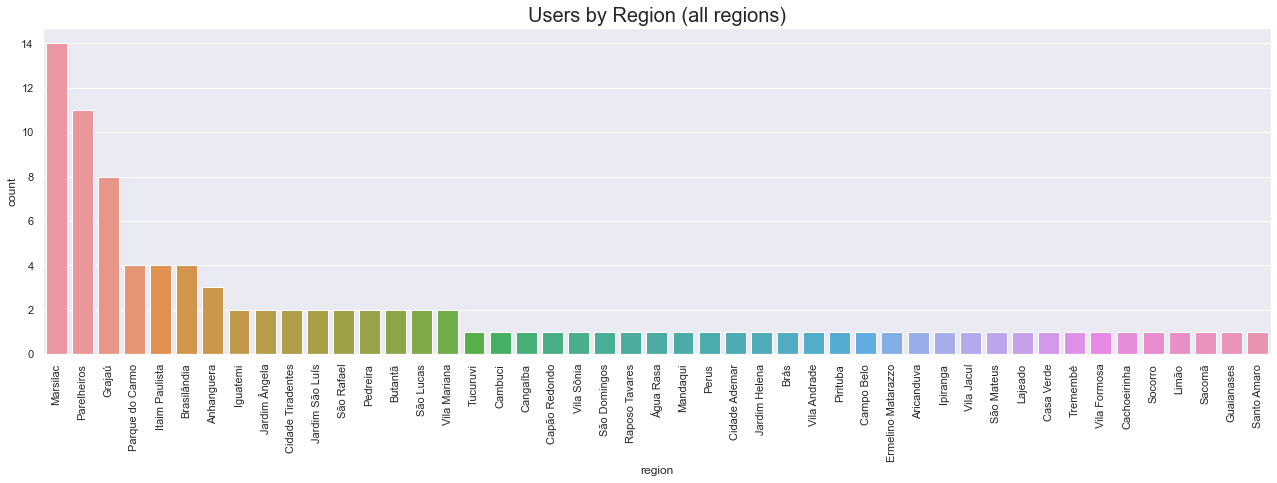

In [60]:
query_1_sql = """
    SELECT region, count(*) FROM dwh.users
    GROUP BY region
    ORDER BY 2 DESC
    """

query_1_df = pd.read_sql(query_1_sql, dwh_connection.get_connection())

plt.figure(figsize=(22, 6))
p = sns.barplot(x="region", y="count", data=query_1_df)

plt.setp(p.get_xticklabels(), rotation=90);
plt.title("Users by Region (all regions)", fontsize=20);

total_num_users = query_1_df['count'].sum()
total_num_users_not_in_region = query_1_df[query_1_df['region'].isna()]['count'].values[0]
total_num_users_in_region = total_num_users - total_num_users_not_in_region

total_num_users_not_in_region_f = round((total_num_users_not_in_region/total_num_users)*100, 2)
total_num_users_in_region_f = round((total_num_users_in_region/total_num_users)*100, 2)

display(f"Total number of users: {total_num_users} (100%)")
display(f"Users not in a region: {total_num_users_not_in_region} ({total_num_users_not_in_region_f}%)")
display(f"Users in a region: {total_num_users_in_region} ({total_num_users_in_region_f}%)")


'Total number of markers: 1000 (100%)'

'Markers not in a region: 149 (14.9%)'

'Markers in a region: 851 (85.1%)'

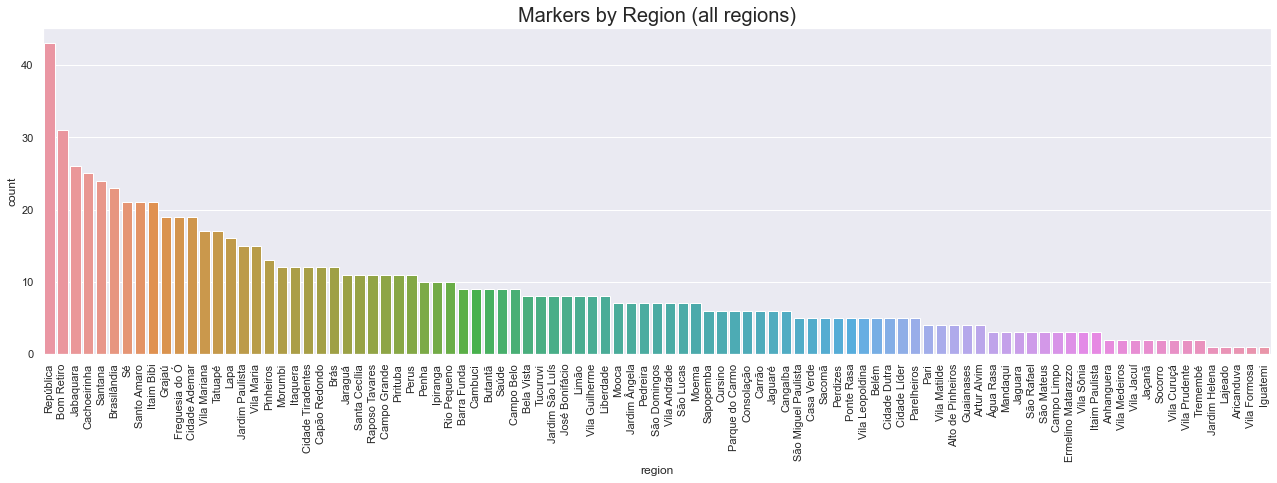

In [61]:
query_2_sql = """
    SELECT region, count(*)
    FROM dwh.markers u 
    GROUP BY region
    ORDER BY 2 DESC
    """

query_2_df = pd.read_sql(query_2_sql, dwh_connection.get_connection())

plt.figure(figsize=(22, 6))
p = sns.barplot(x="region", y="count", data=query_2_df)

plt.setp(p.get_xticklabels(), rotation=90);
plt.title("Markers by Region (all regions)", fontsize=20);

total_num_markers = query_2_df['count'].sum()
total_num_markers_not_in_region = query_2_df[query_2_df['region'].isna()]['count'].values[0]
total_num_markers_in_region = total_num_markers - total_num_markers_not_in_region

total_num_markers_not_in_region_f = round((total_num_markers_not_in_region/total_num_markers)*100, 2)
total_num_markers_in_region_f = round((total_num_markers_in_region/total_num_markers)*100, 2)

display(f"Total number of markers: {total_num_markers} (100%)")
display(f"Markers not in a region: {total_num_markers_not_in_region} ({total_num_markers_not_in_region_f}%)")
display(f"Markers in a region: {total_num_markers_in_region} ({total_num_markers_in_region_f}%)")
